# COVID-19 daily cases by country
Plot the new daily reported cases by country


Data source: World Health Organization, via http://cowid.netlify.com/data/full_data.csv

Download the latest csv and place it in the same directory as this notebook.

In [1]:
# Plots inline with the code
%matplotlib inline

# Data manipulation and visualization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sets the notebook to use the full width of the window
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:98% !important; }</style>"))


In [2]:
df = pd.read_csv('full_data.csv', parse_dates=['date'])
df.rename(columns={'new_cases':'daily_new_cases'}, inplace=True)

# Removes cummulative entries.  We just want the individual countries.
df = df[df['location']!='International']
df = df[df['location']!='World']

In [3]:
# Group the entries by country
groups = df.groupby('location')

# Get the top 9 countries based on total count
# 9 is arbitrary, and only chosen to fit a 3x3 matrix
top9 = list(groups['daily_new_cases'].sum().sort_values(ascending=False).keys()[0:9])

# Filter the dataframe to only contain data from the top 10 countries
top9_df = df[df['location'].isin(top9)]

## No-frills plot, by date

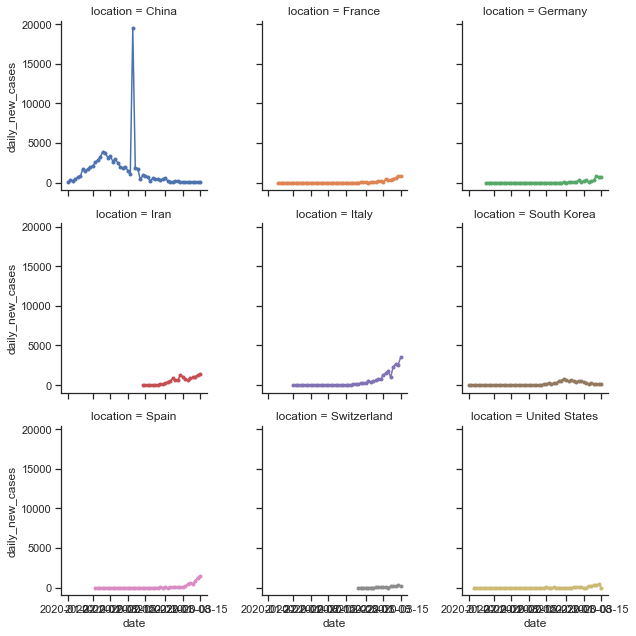

In [4]:
# This is the original plot by date
sns.set(style="ticks")
grid = sns.FacetGrid(top9_df, col="location", hue='location', col_wrap=3, height=3)
grid.map(plt.plot, "date", "daily_new_cases", marker=".")
grid.fig.tight_layout(w_pad=1)

## Calculate days since first reported case, by country

In [5]:
# Rebuild a dataframe with days since first infection, instead of calendar days.
print('Daily new cases per country')
df_list = list()
for c in top9:
    # Find when the first case happened
    first_case = top9_df[top9_df['location'] == c]['date'].min()
    # Then calculates the delta for each data point, from that first date
    days_since_first_case = top9_df[top9_df['location'] == c]['date'] - first_case
    # Build a dataframe for each country
    # We will reassemble each country's dataframe into a larger one for plotting later
    country_df = pd.DataFrame()
    country_df['days_since_first_case'] = days_since_first_case
    country_df['daily_new_cases'] =  top9_df[top9_df['location'] == c]['daily_new_cases']
    country_df['Country'] = c
    df_list.append(country_df)
    print('{}: {}'.format(c, int(country_df['daily_new_cases'].sum())))

countries_df = pd.concat(df_list, ignore_index=True)
countries_df['days_since_first_case'] = countries_df['days_since_first_case'].dt.days

Daily new cases per country
China: 80770
Italy: 21155
Iran: 12727
South Korea: 8161
Spain: 5752
France: 4466
Germany: 3794
United States: 1677
Switzerland: 1358


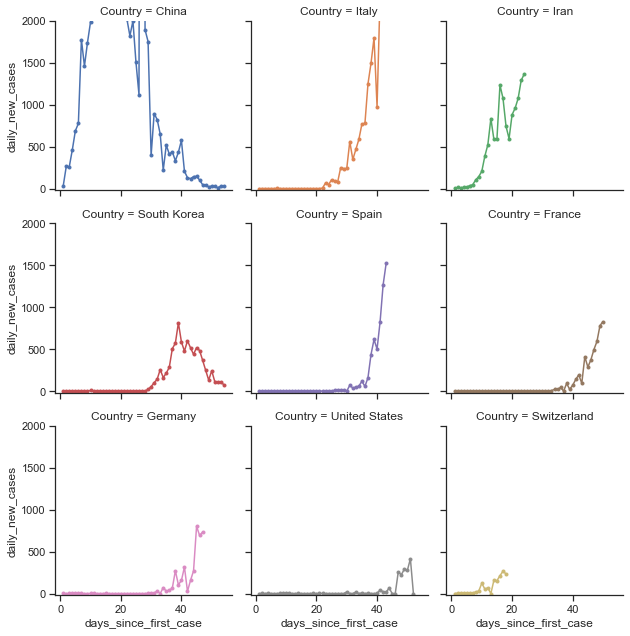

In [6]:
# Plot of daily new cases per country
sns.set(style="ticks")
grid = sns.FacetGrid(countries_df, col="Country", hue='Country', col_wrap=3, height=3)
grid.map(plt.plot, "days_since_first_case", "daily_new_cases", marker=".", )

# Set limit at 2000 cases so we don't obscure countries with a low count
grid.set(ylim = [-20,2000])